## **1. Data Processing**
 - **Importing**: In this section, we prepare the necessary environment by importing important libraries like pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

## **2. Loading the Dataset**
 - **Explanation**: Here, the actual dataset is loaded using pandas from an Excel file (`Concrete_Data.xls`). The dataset contains several columns that describe the different materials used in concrete mixtures and their quantities.
 - **Finding**: The initial preview of the data shows that it includes detailed information about various components in the concrete mixture, including cement, blast furnace slag, water, coarse aggregate, and fine aggregate, as well as the concrete's age and its compressive strength.


In [2]:
# Import the dataset
concrete_data = pd.read_excel("Concrete_Data.xls")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **3. Checking for Missing Data**
 - **Explanation**: This section checks if any data is missing from the dataset. Missing data can lead to incorrect results, so it's important to identify and handle any gaps before proceeding with the analysis.
 - **Finding**: There are no missing data points in the dataset, meaning the data is complete and ready for further analysis.

In [4]:
# Display the first few roows of the dataset
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
# Check for any missing data points
missing_values = concrete_data.isnull().sum()

## **4. Summary Statistics**
 - **Explanation**: A statistical summary of the dataset is generated to provide an overview of key measures such as mean, minimum, and maximum values, as well as the distribution (standard deviation) of each component in the concrete mixture.
 - **Finding**: The dataset reveals that the amount of cement varies between 102 and 540 kg per cubic meter, and the concrete's compressive strength ranges from 2.33 MPa to 82.6 MPa. The data shows a significant variation in the composition of the concrete mixtures.

In [6]:
# Get the statistics of the dataset
summary_statistics = concrete_data.describe()

In [7]:
missing_values, summary_statistics

(Cement (component 1)(kg in a m^3 mixture)                0
 Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
 Fly Ash (component 3)(kg in a m^3 mixture)               0
 Water  (component 4)(kg in a m^3 mixture)                0
 Superplasticizer (component 5)(kg in a m^3 mixture)      0
 Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
 Fine Aggregate (component 7)(kg in a m^3 mixture)        0
 Age (day)                                                0
 Concrete compressive strength(MPa, megapascals)          0
 dtype: int64,
        Cement (component 1)(kg in a m^3 mixture)  \
 count                                1030.000000   
 mean                                  281.165631   
 std                                   104.507142   
 min                                   102.000000   
 25%                                   192.375000   
 50%                                   272.900000   
 75%                                   350.000000   
 max                 

## **5. Exploratory Data Analysis (EDA)**
 - **Explanation**: In this section, visualizations will be used to explore patterns and relationships in the dataset. EDA is an essential step for understanding how different components and the concrete's age influence its strength.
 - **Finding**: The aim here is to observe any correlations between the components of the concrete mixture and the compressive strength. Visual tools like histograms and scatter plots will likely be used to help identify trends and patterns in the data.

In [8]:
# Setting up plot style
sns.set_style("whitegrid")

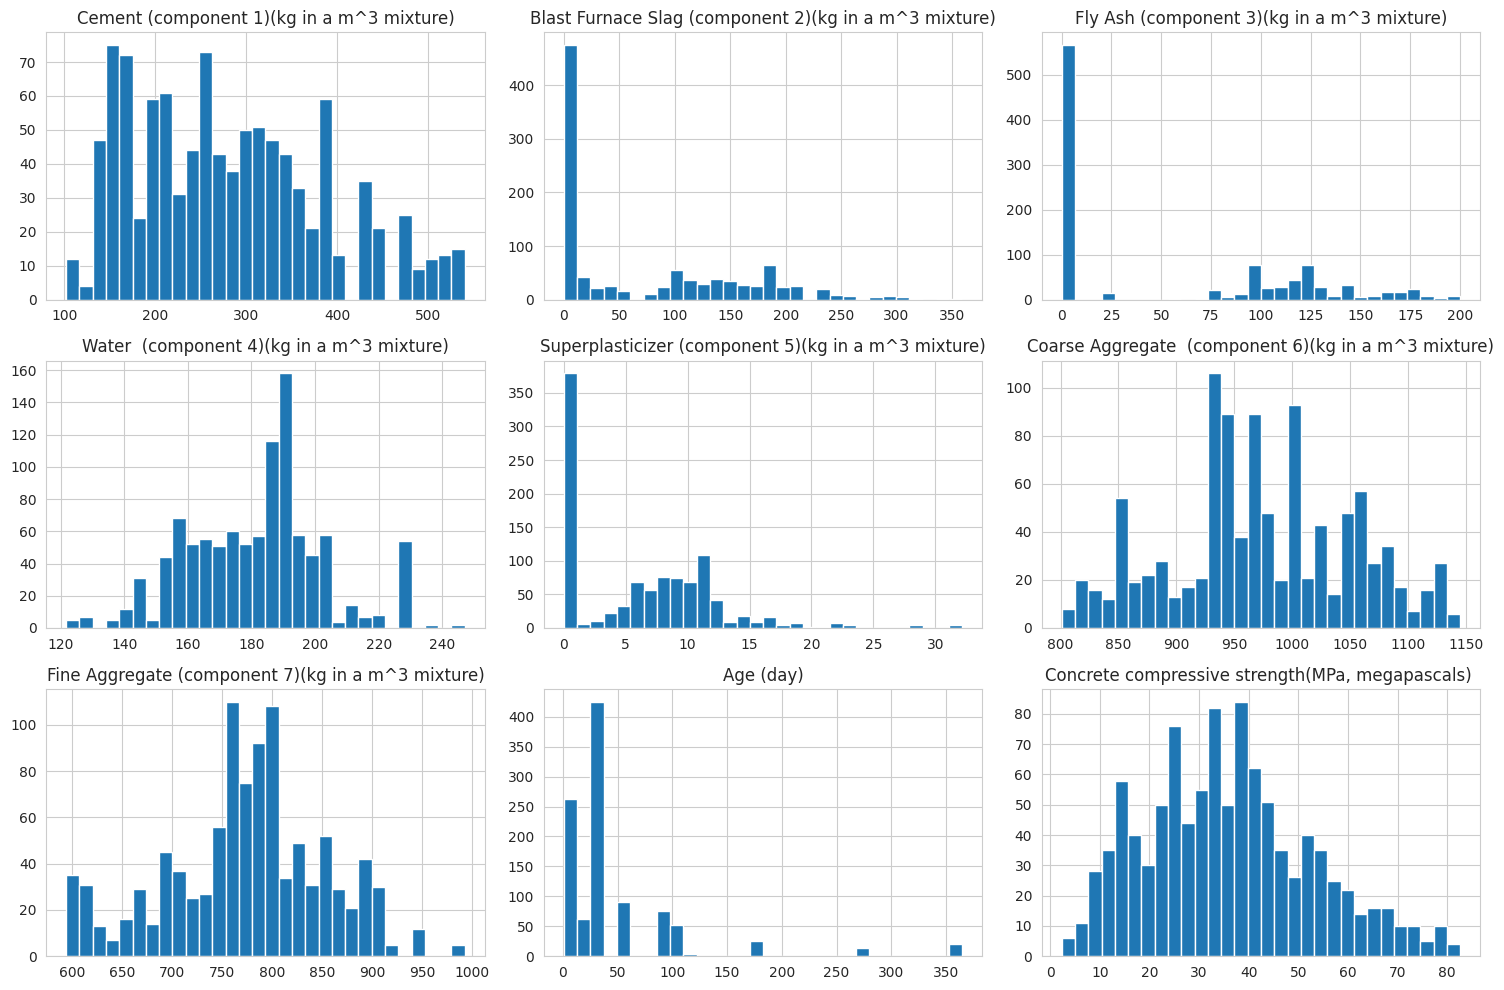

In [9]:
# Generate histograms for each column
concrete_data.hist(bins=30, figsize=(15, 10), layout=(3, 3))

# Display the plots
plt.tight_layout()
plt.show()

In [10]:
# Calculate the correlation matrix
correlation_matrix = concrete_data.corr()

# Display the correlation with concrete compressive strength
compressive_strength_correlation = correlation_matrix["Concrete compressive strength(MPa, megapascals) "].sort_values(ascending=False)
compressive_strength_correlation

,"Concrete compressive strength(MPa, megapascals)"
"Concrete compressive strength(MPa, megapascals)",1.000000
Cement (component 1)(kg in a m^3 mixture),0.497833
Superplasticizer (component 5)(kg in a m^3 mixture),0.366102
Age (day),0.328877
Blast Furnace Slag (component 2)(kg in a m^3 mixture),0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.105753
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.167249
Water (component 4)(kg in a m^3 mixture),-0.289613


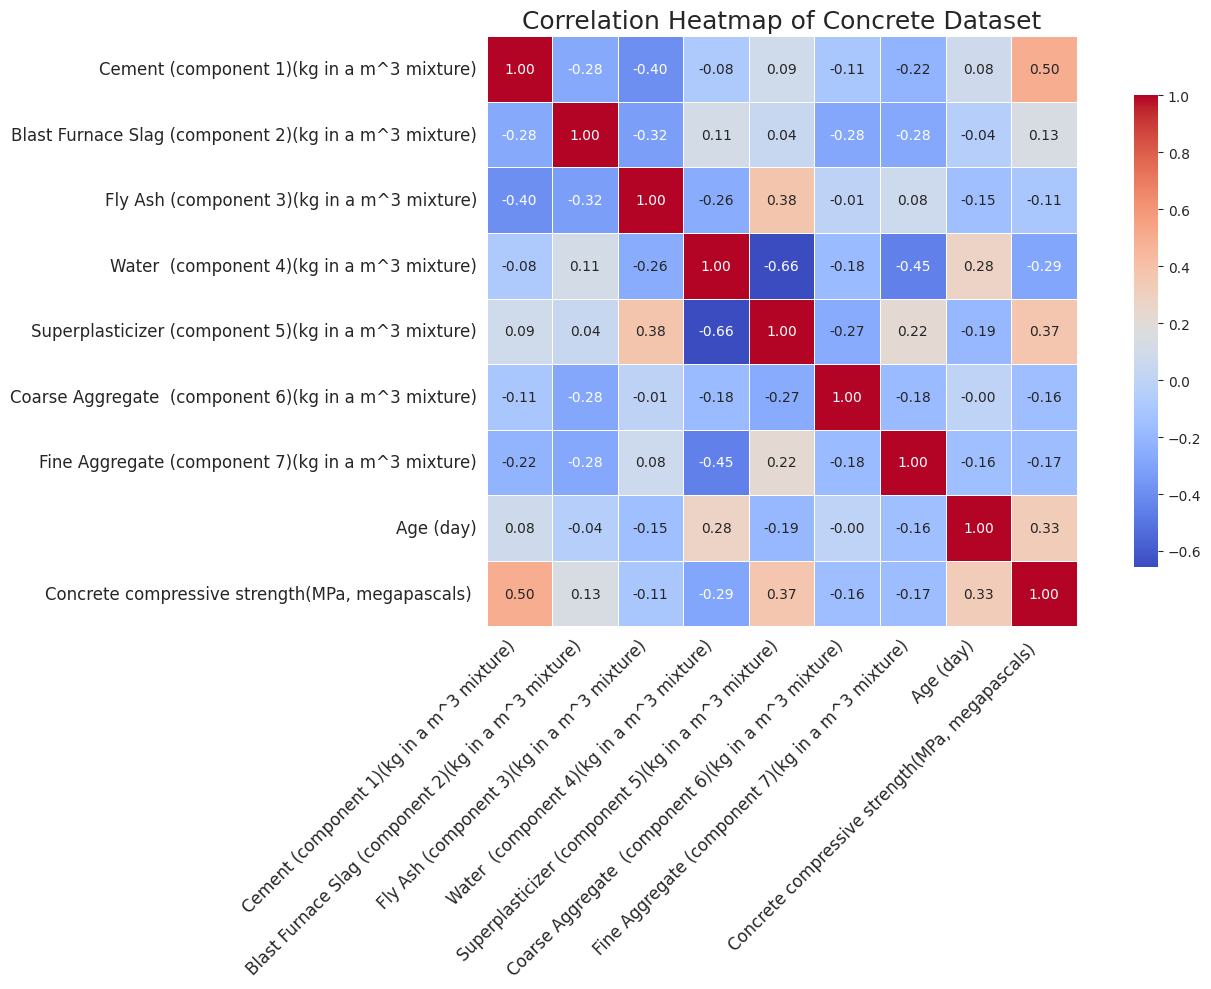

In [11]:
# Set the figure size dynamically based on the number of columns
plt.figure(figsize=(15, 10))

# Generate the heatmap
heatmap = sns.heatmap(concrete_data.corr(),
                      annot=True,
                      cmap='coolwarm',     # Use a diverging color palette
                      fmt='.2f',           # Format numbers to two decimal places
                      linewidths=0.5,      # Add small lines between squares
                      square=True,         # Make the squares in the heatmap
                      annot_kws={'size': 10},  # Set font size for annotations
                      cbar_kws={'shrink': 0.8})  # Shrink the color bar to fit the plot

# Add title and axis labels
plt.title('Correlation Heatmap of Concrete Dataset', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x labels for better readability
plt.yticks(fontsize=12)

# Improve layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

This heatmap illustrates the correlation between various concrete components and compressive strength. Key takeaways:

 - **Cement** and **age** are the strongest factors that positively affect concrete strength, with moderate correlations of **0.50** and **0.33** respectively.
 - **Water** has a negative impact on strength, with a correlation of **-0.29**, meaning more water weakens the concrete.
 - **Superplasticizer** improves strength, showing a positive correlation of **0.37**.
 - Other components like **Blast Furnace Slag** and **Fly Ash** have minimal influence on compressive strength.


This analysis highlights the importance of optimizing cement and water ratios to achieve stronger concrete.

## **6. Splitting the Data and Training a Linear Regression Model**


In [12]:
# Selecting the features and target variable that we listed above
features = ['Cement (component 1)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)',
            'Age (day)', 'Water  (component 4)(kg in a m^3 mixture)']
X = concrete_data[features]
y = concrete_data['Concrete compressive strength(MPa, megapascals) ']

# Splitting the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
linear_reg_model = LinearRegression()

# Training the model
linear_reg_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = linear_reg_model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(114.3712594805091, 0.5561519072797714)

**Description:**

 - **Purpose:** This section trains a basic Linear Regression model to predict concrete compressive strength based on features such as cement content, superplasticizer, age, and water content.
 - **Process:**
  - The data is split into a training set (80%) and a testing set (20%) to evaluate the model's ability to generalize.
  - The Linear Regression model is trained on the training data and used to make predictions on the test data.
  - **Two metrics are calculated:** Mean Squared Error (MSE), which measures how far off the predictions are, and R², which indicates how well the model explains the variation in the data.
 - **Finding:** The MSE and R² values indicate the initial model’s performance. A higher R² (closer to 1) means the model performs well, while a lower R² suggests it may need improvements.

## **7. Feature Engineering with Log Transformations**


In [18]:
X_transformed = X.copy()

# Apply log transformation to 'Age (day)'
X_transformed['Age (day)'] = np.log1p(X_transformed['Age (day)'])

# Create polynomial features again
poly = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly.fit_transform(X_transformed)

# Split the transformed data into training and test sets again
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the model on the transformed data again
linear_reg_model.fit(X_train_poly, y_train_poly)

# Make predictions on the test set again
y_pred_poly = linear_reg_model.predict(X_test_poly)

# Calculate performance metrics on the transformed data again
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

mse_poly, r2_poly


(72.77159158706877, 0.7175904831611972)

**Description:**

 - **Purpose:** To improve the model, a log transformation is applied to the Age feature. This transformation helps reduce the impact of extreme values or skewness in the data.
 - **Process:**
  - The log transformation smooths out the effect of large values in the "Age" feature.
  - After the transformation, the model is retrained and evaluated using the same metrics (MSE and R²).
 - **Finding:** The new MSE and R² values are compared with the previous results. If R² improves, it means the transformation helped the model better capture the relationships in the data.

## **8. Visualizing Actual vs. Predicted Values(Graph 1)**

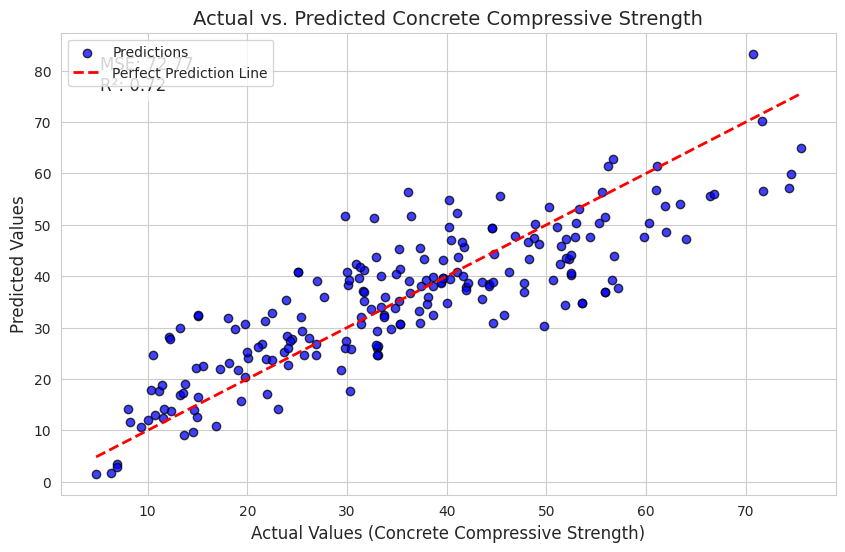

In [14]:
# Scatter plot of Actual vs. Predicted values with enhancements
plt.figure(figsize=(10, 6))

# Plot actual vs predicted values with better aesthetics
plt.scatter(y_test_poly, y_pred_poly, alpha=0.75, color='blue', edgecolor='k', label='Predictions')

# Plot the 1:1 line for reference (perfect predictions)
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()],
         color='red', linestyle='--', lw=2, label='Perfect Prediction Line')

# Add labels and title
plt.xlabel('Actual Values (Concrete Compressive Strength)', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs. Predicted Concrete Compressive Strength', fontsize=14)

# Add grid for better readability
plt.grid(True)

# Annotate plot with R² and MSE
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
plt.text(0.05, 0.95, f'MSE: {mse_poly:.2f}\nR²: {r2_poly:.2f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Display legend
plt.legend()

# Show the plot
plt.show()


This scatter plot compares the actual concrete compressive strength with the predicted values from our model. The red dashed line represents perfect predictions, and points closer to this line indicate higher accuracy.

### **Key insights:**
 - The model generally performs well, as most predictions align closely with the actual values, following an upward trend.
 - There are some outliers where the model struggles, particularly with higher strength values, suggesting potential areas for improvement.
 - Overall, the model captures the relationship between variables and compressive strength but could benefit from further refinement for more accurate predictions.

This visualization highlights the model’s strengths and provides insight into where additional tuning may be needed.

## **9. Introducing Polynomial Features (Degree 4)**


In [15]:
# Create polynomial features again
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X_transformed)

# Split the transformed data into training and test sets again
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the model on the transformed data again
linear_reg_model.fit(X_train_poly, y_train_poly)

# Make predictions on the test set again
y_pred_poly = linear_reg_model.predict(X_test_poly)

# Calculate performance metrics on the transformed data again
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

mse_poly, r2_poly


(70.2980343384461, 0.727189779977742)

The output from this code shows two key performance metrics of the model trained using polynomial features of degree 4:

 - **Mean Squared Error (MSE):** 70.30 – This measures the average squared difference between the predicted and actual values. A lower MSE indicates better accuracy. Here, a value of 70.30 means the model's predictions, on average, deviate from the actual compressive strength by this amount (squared).

 - **R² Score:** 0.73 – This indicates how well the model explains the variability in the data, with 1 being a perfect score. An R² of 0.73 means the model explains 73% of the variability in the concrete strength based on the input features.

### **Summary:**
The model with polynomial features of degree 4 performs reasonably well, explaining 73% of the variability in the concrete compressive strength. However, there is still room for improvement, as the predictions deviate by an average of 70.30 (squared). Further refinement or exploring other model types could help increase accuracy.

## **10. Visualizing Predictions for the Degree 4 Polynomial Model(Graph 2)**

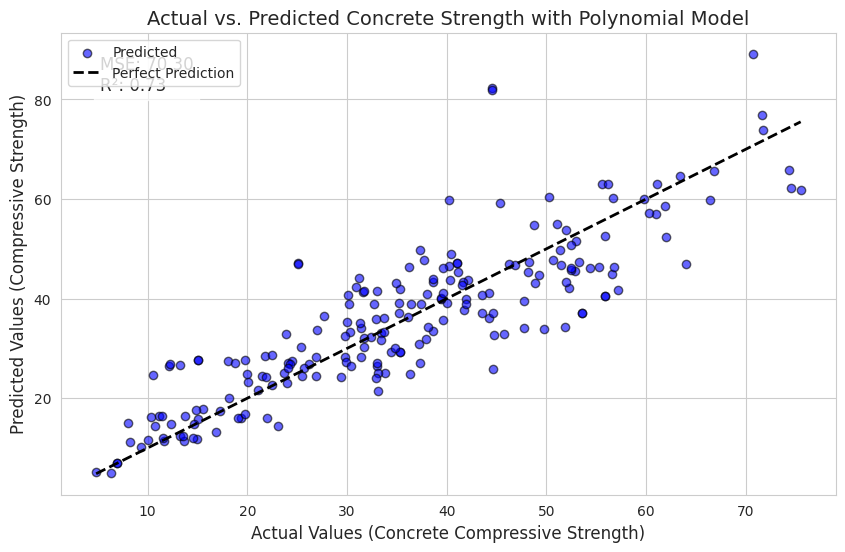

In [16]:
# Scatter plot of Actual vs. Predicted values with enhancements
plt.figure(figsize=(10, 6))

# Scatter points with better aesthetics
plt.scatter(y_test_poly, y_pred_poly, alpha=0.6, color='blue', edgecolor='k', label='Predicted')

# Perfect prediction line (1:1 line)
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()],
         color='black', linestyle='--', lw=2, label='Perfect Prediction')

# Calculate performance metrics (MSE and R²)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

# Add axis labels and title
plt.xlabel('Actual Values (Concrete Compressive Strength)', fontsize=12)
plt.ylabel('Predicted Values (Compressive Strength)', fontsize=12)
plt.title('Actual vs. Predicted Concrete Strength with Polynomial Model', fontsize=14)

# Annotate with MSE and R²
plt.text(0.05, 0.95, f'MSE: {mse_poly:.2f}\nR²: {r2_poly:.2f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Add grid for better readability
plt.grid(True)

# Display legend
plt.legend()

# Show the plot
plt.show()


### **Graph 2 (Black Dashed Line - Polynomial Degree 4 Model)**
 - **Model Used:** This graph uses a polynomial regression model with a higher degree (degree 4).
 - **Key Observation:**
  - The black dashed line also represents perfect predictions.
  - With this more complex model, the predictions are still closely aligned with actual values but have improved accuracy in capturing nonlinear relationships.
  - Some outliers are still present, particularly at higher strength values, though the overall trend is similar.

### **Comparison Summary:**
1. **Model Complexity:**
 - Graph 2 uses a more complex model (degree 4), while Graph 1 uses a simpler polynomial model (degree 2).
2. **Accuracy:**
 - Both graphs show good alignment between predicted and actual values, but the higher degree model (Graph 2) may better capture subtle patterns in the data. However, both models still exhibit some prediction errors at higher strength values.
3. **Outliers:**
 - In both models, the points deviating further from the dashed line represent areas where the model has difficulty accurately predicting compressive strength, particularly for higher strength values.

### **Conclusion:**
Both models provide reasonably good predictions for concrete compressive strength, with the degree 4 model (Graph 2) potentially capturing more complex relationships in the data. However, both models struggle with higher compressive strength values, indicating potential areas for improvement, such as further tuning or exploring more advanced models.

## **11. Learning Curves for Different Polynomial Degrees**


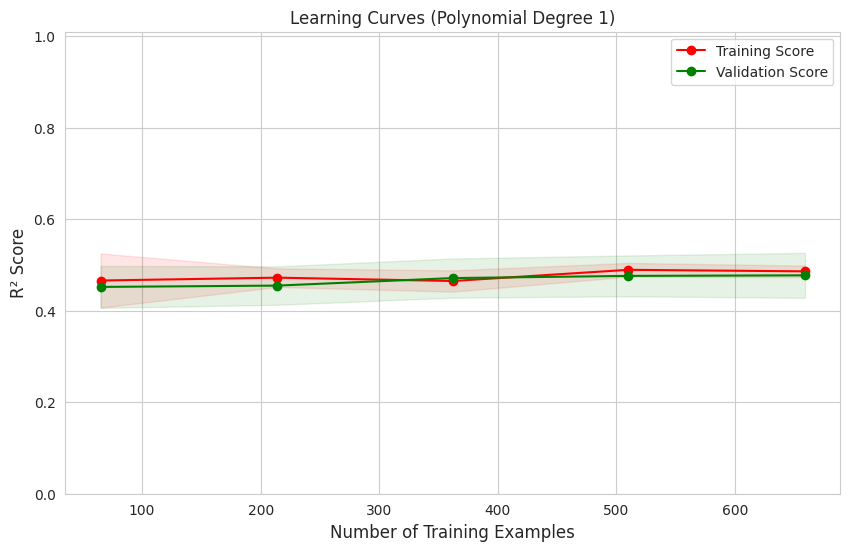

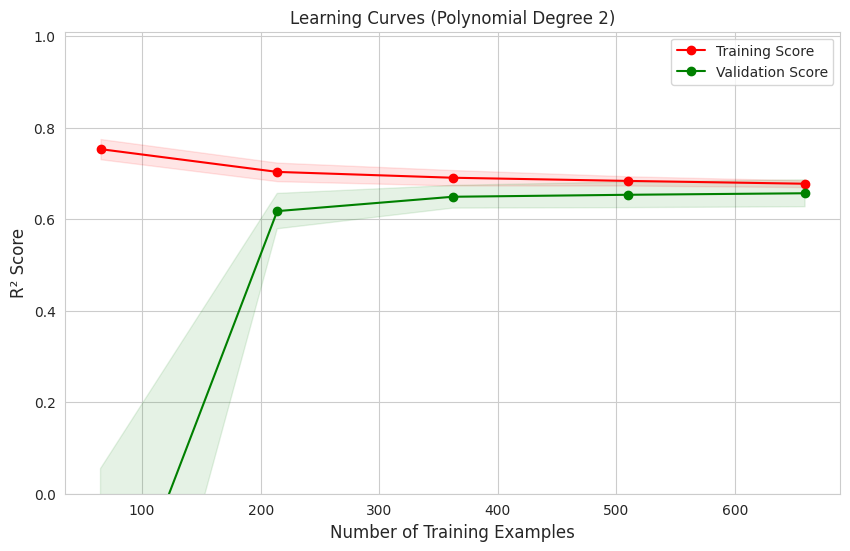

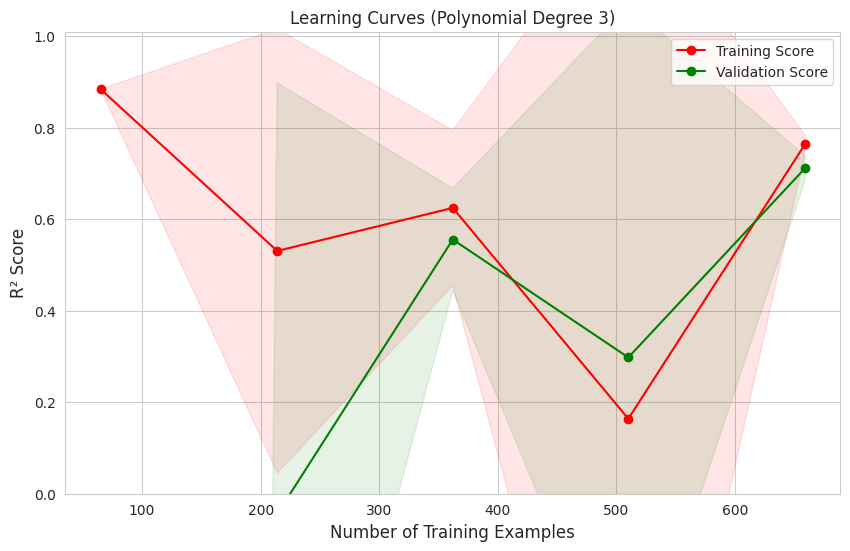

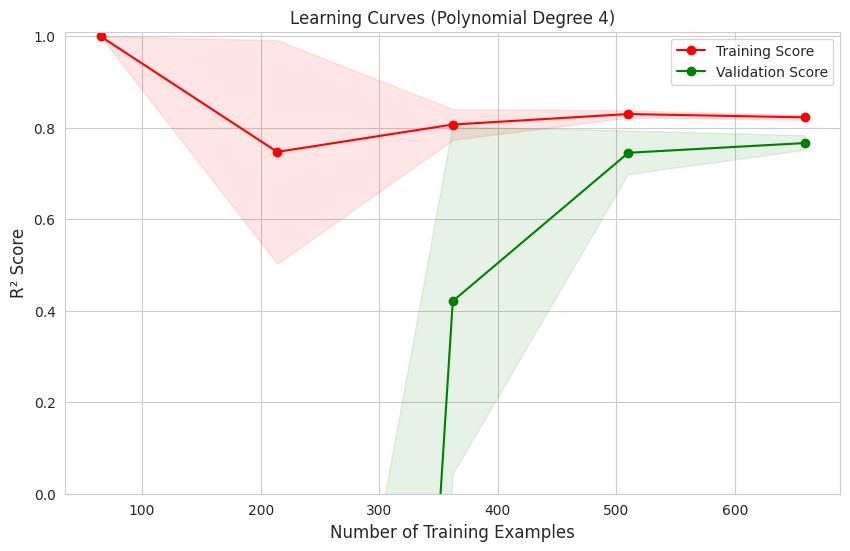

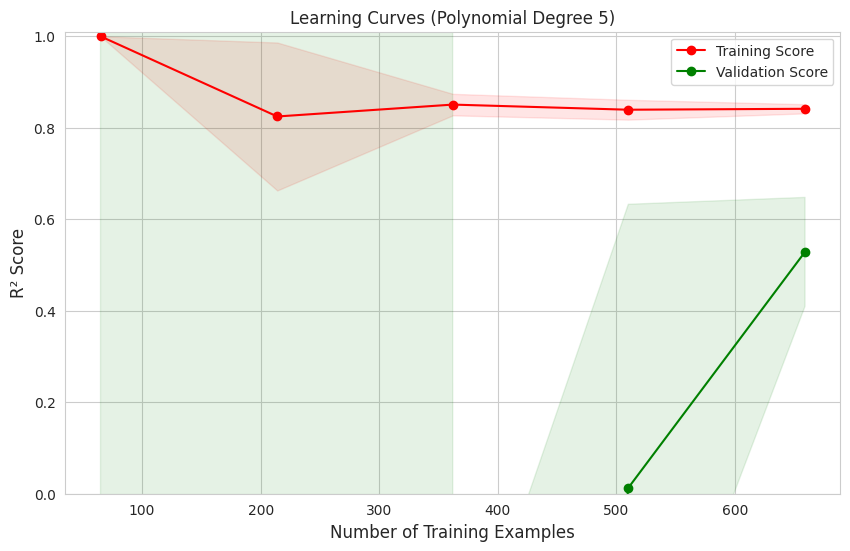

In [17]:
degrees = np.arange(1, 6)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots the learning curves for both the training and validation (cross-validation) sets.

    Parameters:
    ----------
    - estimator: The model pipeline or algorithm to evaluate.
    - title: The title of the plot.
    - X, y: Training data (features and target).
    - ylim: Defines y-axis limits.
    - cv: Cross-validation strategy.
    - n_jobs: Number of jobs for parallel processing.
    - train_sizes: Range of training set sizes used to generate the learning curve.
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)

    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Number of Training Examples", fontsize=12)
    plt.ylabel("R² Score", fontsize=12)

    # Generate the learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')

    # Compute the mean and standard deviation for the training and cross-validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the training and validation scores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Score")

    plt.grid(True)
    plt.legend(loc="best", fontsize=10)

    return plt


def plot_learning_curves_for_degrees(X_train, y_train, degrees, cv=5, n_jobs=-1):
    """
    Iterates through different degrees of polynomial features and plots their learning curves.

    Parameters:
    ----------
    - X_train, y_train: The training data (features and target).
    - degrees: Array of polynomial degrees to evaluate.
    - cv: Cross-validation strategy.
    - n_jobs: Number of jobs for parallel processing.
    """
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        title = f"Learning Curves (Polynomial Degree {degree})"

        # Call the learning curve plotting function
        plot_learning_curve(model, title, X_train, y_train, ylim=(0, 1.01), cv=cv, n_jobs=n_jobs)

    # Display all the learning curve plots
    plt.show()

# Example call to plot learning curves
plot_learning_curves_for_degrees(X_train, y_train, degrees, cv=5, n_jobs=4)


These learning curve graphs illustrate how the polynomial degree of a regression model affects its performance as the number of training examples increases:

### **Key Points:**
**1. Polynomial Degree 1 (Linear Regression):**
 - **Training and Validation Scores:** Both training and validation scores are closely aligned, indicating low variance (consistent model performance).
 - **Overall R² Score:** The R² score is around 0.4 to 0.5, which suggests that the model has a low capacity to capture the complexity of the data.
 - **Conclusion:** This model is likely underfitting, as it cannot capture the more complex relationships between the input features and the target variable.

**2. Polynomial Degree 2:**
 - **Training Score:** Starts high and slightly decreases as more data is added, but remains stable around 0.8, indicating a good fit on training data.
 - **Validation Score:** The validation score improves as more data is used, stabilizing around 0.6. The gap between training and validation scores is moderate.
 - **Conclusion:** This degree offers a balance between bias and variance, showing some improvement over the linear model. However, there is still a gap between the training and validation scores, indicating some overfitting.

**3. Polynomial Degree 3:**
 - **Training Score:** Initially high but fluctuates, indicating that the model struggles with overfitting on smaller datasets.
 - **Validation Score:** Fluctuates significantly with more data, showing instability in the model’s ability to generalize.
 - **Conclusion:** This degree shows high variance, meaning the model may be too complex for the amount of data available, leading to overfitting and inconsistent performance.

**4. Polynomial Degree 4:**
 - Training Score: High and stable, with an R² around 0.8, indicating the model fits the training data well.
 - Validation Score: The validation score improves as more data is added, eventually stabilizing close to the training score.
 - Conclusion: This model captures more complexity in the data without excessively overfitting. It’s a good balance of complexity and generalization, making it a strong candidate for modeling.

**5. Polynomial Degree 5:**
 - **Training Score:** Starts very high (close to 1), indicating the model fits the training data almost perfectly.
 - **Validation Score:** Starts low and only improves significantly with a large amount of data.
 - **Conclusion:** This degree shows clear signs of overfitting—the model is too complex, and although the training score is very high, it struggles to generalize to unseen data, especially with smaller datasets.

### **Summary:**
 - **Degree 1** (linear model) underfits the data and cannot capture complex patterns.
 - **Degree 2** and **4** offer the best balance between bias and variance, with Degree 4 providing the best performance overall.
 - **Degree 3** and **5** show signs of overfitting, as they are too complex for the amount of training data and fluctuate in performance.


**Recommendation:** The **Degree 4** model provides the best balance between capturing data complexity and avoiding overfitting, making it the most suitable choice for this dataset.